In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import metrics 
from tensorflow.keras.layers import Layer,Add, add,AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D ,Lambda ,GlobalAveragePooling2D,DepthwiseConv2D
from tensorflow.keras.layers import concatenate, Add, BatchNormalization, Activation, PReLU, LeakyReLU ,Reshape,Multiply, multiply
from tensorflow.keras import regularizers , Input ,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage , misc

In [2]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 32
IMG_WIDTH = 32
QP = "QP22"
train_dir = "D:/VCCResearch/"+QP+"/dependency_data"
valid_dir = "D:/VCCResearch/"+QP+"/valid_depthall"
#QT_train_dir = "D:/VCCResearch/"+QP+"/dependency_QT78"
TT_train_dir = "D:/VCCResearch/"+QP+"/TT_CU/train_TT"
TT_valid_dir = "D:/VCCResearch/"+QP+"/TT_CU/valid_TT"

QT_train_dir = "D:/VCCResearch/"+QP+"/train_QT_24"
QT_valid_dir = "D:/VCCResearch/"+QP+"/valid_QT_24"

# TT OR NOT

In [491]:

train_have_TT_dir = os.path.join(TT_train_dir, 'have_tt')
train_no_TT_dir = os.path.join(TT_train_dir, 'no_tt')

num_have_TT_tr = len(os.listdir(train_have_TT_dir))
num_no_TT_tr = len(os.listdir(train_no_TT_dir))

print("Have TT: %d"%num_have_TT_tr)
print("No TT: %d"%num_no_TT_tr)

total_train_TT = num_have_TT_tr+num_no_TT_tr

print("===================================================")

print("Have TT: %.4f"%(num_have_TT_tr/total_train_TT))
print("No TT: %.4f"%(num_no_TT_tr/total_train_TT))


Have TT: 27235
No TT: 35469
Have TT: 0.4343
No TT: 0.5657


In [492]:

valid_have_TT_dir = os.path.join(TT_valid_dir, 'have_tt')
valid_no_TT_dir = os.path.join(TT_valid_dir, 'no_tt')

num_have_TT_val = len(os.listdir(valid_have_TT_dir))
num_no_TT_val = len(os.listdir(valid_no_TT_dir))

print("Have TT: %d"%num_have_TT_val)
print("No TT: %d"%num_no_TT_val)


total_valid_TT = num_have_TT_val+num_no_TT_val

print("===================================================")

print("Have TT: %.4f"%(num_have_TT_val/total_valid_TT))
print("No TT: %.4f"%(num_no_TT_val/total_valid_TT))

Have TT: 55126
No TT: 70282
Have TT: 0.4396
No TT: 0.5604


In [493]:
print(total_train_TT)
print(total_valid_TT)

62704
125408


In [494]:
TT_train_image_generator = ImageDataGenerator(rescale = 1./255)
TT_train_data_gen = TT_train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=TT_train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 62704 images belonging to 2 classes.


In [495]:
TT_validation_image_generator = ImageDataGenerator(rescale = 1./255)
TT_val_data_gen = TT_validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=TT_valid_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              shuffle=False,
                                                              class_mode='categorical')

Found 125408 images belonging to 2 classes.


# QT

In [496]:

train_QT2_dir = os.path.join(QT_train_dir, 'QT1')
train_QT3_dir = os.path.join(QT_train_dir, 'QT2')

num_QT2_tr = len(os.listdir(train_QT2_dir))
num_QT3_tr = len(os.listdir(train_QT3_dir))



print("QT2: %d"%num_QT2_tr)
print("QT3: %d"%num_QT3_tr)

total_train_QT = num_QT2_tr+num_QT3_tr

print("===================================================")

print("QT2: %.4f"%(num_QT2_tr/total_train_QT))
print("QT3: %.4f"%(num_QT3_tr/total_train_QT))


QT2: 43212
QT3: 79813
QT2: 0.3512
QT3: 0.6488


In [497]:

valid_QT2_dir = os.path.join(QT_valid_dir, 'QT1')
valid_QT3_dir = os.path.join(QT_valid_dir, 'QT2')

num_QT2_valid = len(os.listdir(valid_QT2_dir))
num_QT3_valid = len(os.listdir(valid_QT3_dir))


print("QT2: %d"%num_QT2_valid)
print("QT3: %d"%num_QT3_valid)

total_valid_QT = num_QT2_valid+num_QT3_valid


print("===================================================")
print("QT2: %.4f"%(num_QT2_valid/total_valid_QT))
print("QT3: %.4f"%(num_QT3_valid/total_valid_QT))

QT2: 18316
QT3: 37083
QT2: 0.3306
QT3: 0.6694


In [498]:
print(total_train_QT)
print(total_valid_QT)

123025
55399


In [499]:
QT_train_image_generator = ImageDataGenerator(rescale = 1./255)
QT_train_data_gen = QT_train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=QT_train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 123025 images belonging to 2 classes.


In [500]:
QT_validation_image_generator = ImageDataGenerator(rescale = 1./255)
QT_val_data_gen = QT_validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=QT_valid_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              shuffle=False,
                                                              class_mode='categorical')

Found 55399 images belonging to 2 classes.


# QT+BT+TT

In [81]:

train_depth5_6_dir = os.path.join(train_dir, 'depth5_6')
train_depth7_8_dir = os.path.join(train_dir, 'depth7_8')
train_depth9_10_dir = os.path.join(train_dir, 'depth9_10')


num_depth5_6_tr = len(os.listdir(train_depth5_6_dir))
num_depth7_8_tr = len(os.listdir(train_depth7_8_dir))
num_depth9_10_tr = len(os.listdir(train_depth9_10_dir))


print("depth5_6: %d"%num_depth5_6_tr)
print("depth7_8: %d"%num_depth7_8_tr)
print("depth9_10: %d"%num_depth9_10_tr)


total_train = num_depth5_6_tr+num_depth7_8_tr+num_depth9_10_tr

print("===================================================")

print("depth5_6: %.3f"%(num_depth5_6_tr/total_train))
print("depth7_8: %.3f"%(num_depth7_8_tr/total_train))
print("depth9_10: %.3f"%(num_depth9_10_tr/total_train))



depth5_6: 25056
depth7_8: 58761
depth9_10: 29184
depth5_6: 0.222
depth7_8: 0.520
depth9_10: 0.258


In [82]:

valid_depth5_6_dir = os.path.join(valid_dir, 'depth5_6')
valid_depth7_8_dir = os.path.join(valid_dir, 'depth7_8')
valid_depth9_10_dir = os.path.join(valid_dir, 'depth9_10')


num_depth5_6_valid = len(os.listdir(valid_depth5_6_dir))
num_depth7_8_valid = len(os.listdir(valid_depth7_8_dir))
num_depth9_10_valid = len(os.listdir(valid_depth9_10_dir))




print(num_depth5_6_valid)
print(num_depth7_8_valid)
print(num_depth9_10_valid)



total_val = num_depth5_6_valid+num_depth7_8_valid+num_depth9_10_valid

print("===================================================")

print("depth5_6: %.3f"%(num_depth5_6_valid/total_val))
print("depth7_8: %.3f"%(num_depth7_8_valid/total_val))
print("depth9_10: %.3f"%(num_depth9_10_valid/total_val))

16743
38440
31569
depth5_6: 0.193
depth7_8: 0.443
depth9_10: 0.364


In [83]:
print(total_train)
print(total_val)

113001
86752


In [85]:
train_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 113001 images belonging to 3 classes.


In [86]:

validation_image_generator = ImageDataGenerator(rescale = 1./255)

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=valid_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              shuffle=False,
                                                              class_mode='categorical')


Found 86752 images belonging to 3 classes.


In [58]:
sample_training_images, tr_label = next(train_data_gen)
print(sample_training_images.shape)
print(tf.image.rgb_to_yuv(sample_training_images[0])[:,:,0:1])
print("=====")
print(sample_training_images[0][:,:,1])
print("=====")
print(sample_training_images[0][:,:,2])
#print(tf.image.rgb_to_yuv(sample_training_images[0])[:,:,0:1])

(128, 32, 32, 3)
tf.Tensor(
[[[0.6431373 ]
  [0.63921577]
  [0.7294118 ]
  ...
  [0.5803922 ]
  [0.4431373 ]
  [0.5294118 ]]

 [[0.67058825]
  [0.6627451 ]
  [0.7137255 ]
  ...
  [0.6       ]
  [0.5019608 ]
  [0.46274513]]

 [[0.69803923]
  [0.6901961 ]
  [0.72156864]
  ...
  [0.5686275 ]
  [0.58431375]
  [0.45098042]]

 ...

 [[0.6117647 ]
  [0.6745098 ]
  [0.6509804 ]
  ...
  [0.7137255 ]
  [0.50980395]
  [0.50980395]]

 [[0.59607846]
  [0.7058824 ]
  [0.60784316]
  ...
  [0.74509805]
  [0.5568628 ]
  [0.6156863 ]]

 [[0.654902  ]
  [0.7294118 ]
  [0.54901963]
  ...
  [0.7254902 ]
  [0.69803923]
  [0.6117647 ]]], shape=(32, 32, 1), dtype=float32)
=====
[[0.6431373  0.6392157  0.7294118  ... 0.5803922  0.4431373  0.5294118 ]
 [0.67058825 0.6627451  0.7137255  ... 0.6        0.5019608  0.46274513]
 [0.69803923 0.6901961  0.72156864 ... 0.5686275  0.58431375 0.45098042]
 ...
 [0.6117647  0.6745098  0.6509804  ... 0.7137255  0.50980395 0.50980395]
 [0.59607846 0.7058824  0.60784316 ... 0

In [59]:
def plotImages(images_arr):
    fig, axes = plt.subplots(8, 16, figsize=(32,32))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

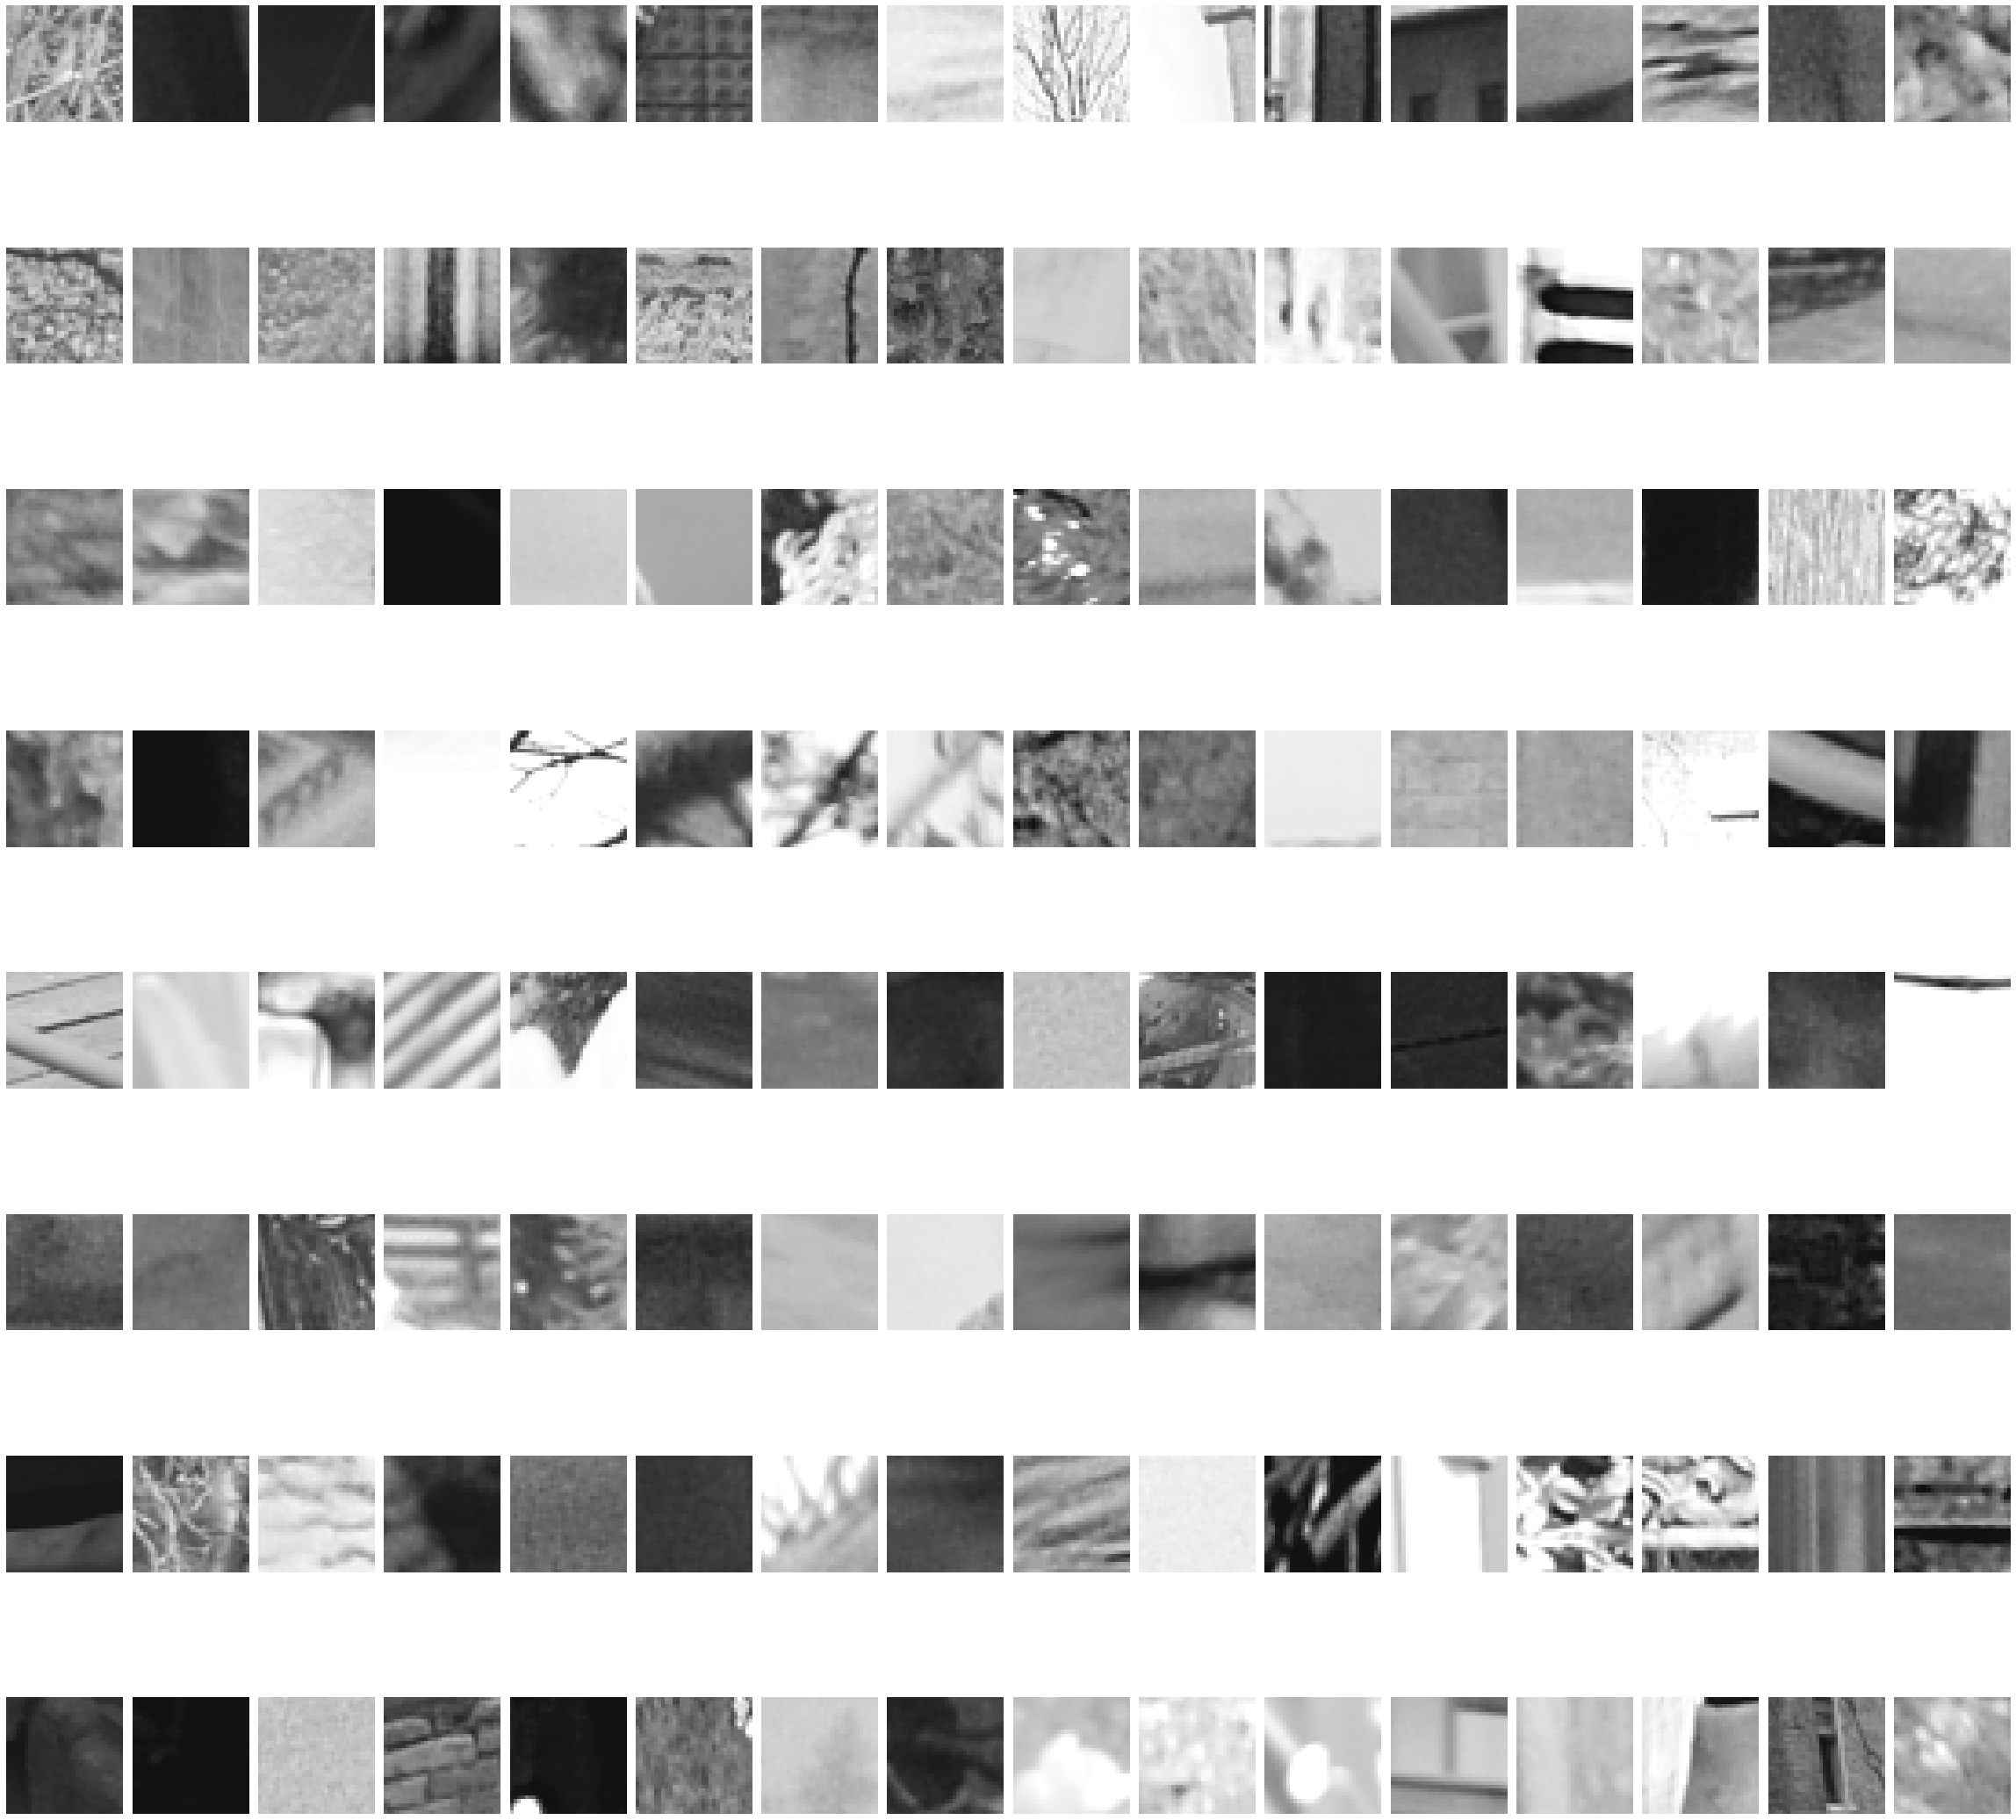

In [60]:
plotImages(sample_training_images[:128])

# Model

In [102]:
class Swish(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(Swish, self).__init__(**kwargs)
        self.supports_masking = True

    def call(self, inputs, training=None):
        return tf.nn.swish(inputs)

In [288]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        self.filters1, self.filters2, self.filters3 = filters

        self.conv2a = Conv2D(self.filters1, (3, 3),padding = 'same')
        self.bn2a = BatchNormalization()

        self.conv2b = Conv2D(self.filters2, (3, 3), padding='same')
        self.bn2b = BatchNormalization()

        self.conv2c = Conv2D(self.filters3, (3, 3),padding = 'same')
        self.bn2c = BatchNormalization()
        
        self.gap = GlobalAveragePooling2D()
        self.d1  = Dense(self.filters3 // 4)
        self.d2  = Dense(self.filters3 )
'''
    def squeeze_excitation_layer(self, x):
 
        squeeze = GlobalAveragePooling2D()(x)

        excitation = Dense(units= self.filters3// 4)(squeeze)
        excitation = tf.nn.relu(excitation)
        excitation = Dense(units=self.filters3)(excitation)
        excitation = tf.nn.sigmoid(excitation)
        excitation = Reshape((1,1,self.filters3))(excitation)

        scale = multiply([x,excitation])

        return scale
'''
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        #x = self.squeeze_excitation_layer(x)
        squeeze = self.gap(x)

        excitation = self.d1(squeeze)
        excitation = tf.nn.relu(excitation)
        excitation = self.d2(excitation)
        excitation = tf.nn.sigmoid(excitation)
        excitation = Reshape((1,1,self.filters3))(excitation)

        x = multiply([x,excitation])
        x += input_tensor
        return tf.nn.relu(x)

In [289]:
'''
class Attention(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(Attention, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2f = Conv2D(filters1, (1, 1),padding = 'same')

        self.conv2g = Conv2D(filters2, (1, 1), padding='same')
        
        self.conv2h = Conv2D(filters3, (1, 1),padding = 'same')
        
        
    def call(self, input_tensor):
        def hw_flatten(x):
            return tf.reshape(x, shape=[tf.shape(x)[0], -1 , tf.shape(x)[-1]])
        s = tf.matmul(hw_flatten(self.conv2g(input_tensor)), hw_flatten(self.conv2f(input_tensor)), transpose_b=True) # # [bs, N, N]

        beta = tf.nn.softmax(s)  # attention map

        o = tf.matmul(beta, hw_flatten(self.conv2h(input_tensor))) # [bs, N, C]
        self.gamma = self.add_weight(name='gamma', shape=[1], initializer='uniform', trainable=True)

        o = tf.reshape(o, shape=tf.shape(input_tensor)) # [bs, h, w, C]
        x = self.gamma * o + input_tensor

        return x
'''

"\nclass Attention(tf.keras.Model):\n    def __init__(self, kernel_size, filters):\n        super(Attention, self).__init__(name='')\n        filters1, filters2, filters3 = filters\n\n        self.conv2f = Conv2D(filters1, (1, 1),padding = 'same')\n\n        self.conv2g = Conv2D(filters2, (1, 1), padding='same')\n        \n        self.conv2h = Conv2D(filters3, (1, 1),padding = 'same')\n        \n        \n    def call(self, input_tensor):\n        def hw_flatten(x):\n            return tf.reshape(x, shape=[tf.shape(x)[0], -1 , tf.shape(x)[-1]])\n        s = tf.matmul(hw_flatten(self.conv2g(input_tensor)), hw_flatten(self.conv2f(input_tensor)), transpose_b=True) # # [bs, N, N]\n\n        beta = tf.nn.softmax(s)  # attention map\n\n        o = tf.matmul(beta, hw_flatten(self.conv2h(input_tensor))) # [bs, N, C]\n        self.gamma = self.add_weight(name='gamma', shape=[1], initializer='uniform', trainable=True)\n\n        o = tf.reshape(o, shape=tf.shape(input_tensor)) # [bs, h, w, C]\n 

In [290]:
def rgb2yuv_conversion(x):   
    return tf.image.rgb_to_yuv(x)[:,:,:,0:1]

# MNet base Model

In [463]:
def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v

def swish(x):
        """Swish activation function: x * sigmoid(x).
        Reference: [Searching for Activation Functions](https://arxiv.org/abs/1710.05941)
        """

        return tf.nn.sigmoid(x) * x

def MobileNetv2(input_shape, k, alpha=1.0):

    inputs_img = Input(shape=input_shape,name = 'Input0')

    first_filters = _make_divisible(16 * alpha, 8)
    '''conv0'''
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    x = Conv2D(16, (3,3), padding='same', strides=(1,1),name='conv0')(inputs_img)
    x = BatchNormalization(axis=channel_axis,name='BN0')(x)
    x = Activation(swish)(x) ##16
    '''conv0'''
    
    '''_inverted_residual_block stage1 '''
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 1
    # Width
    cchannel = int(16 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv1')(x)
    x = BatchNormalization(axis=channel_axis,name='BN1')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv2')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN2')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv3')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN3')(x)
    #x = Add()([x, inputs])
    ###################################
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 1
    # Width
    cchannel = int(16 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv4')(x)
    x = BatchNormalization(axis=channel_axis,name='BN4')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv5')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN5')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv6')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN6')(x)
    x = Add()([x, inputs])
    '''_inverted_residual_block stage1'''
    
    x = Conv2D(16, (2,2), padding='same', strides=(2,2),name='conv7')(x)
    x = BatchNormalization(axis=channel_axis,name='BN7')(x)
    x = Activation(swish)(x)
    
    '''_inverted_residual_block stage2'''
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv8')(x)
    x = BatchNormalization(axis=channel_axis,name='BN8')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv9')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN9')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv10')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN10')(x)
    #x = Add()([x, inputs])
    
    ###################################
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv11')(x)
    x = BatchNormalization(axis=channel_axis,name='BN11')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv12')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN12')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv13')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN13')(x)
    x = Add()([x, inputs])
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv14')(x)
    x = BatchNormalization(axis=channel_axis,name='BN14')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv15')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN15')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv16')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN16')(x)
    x = Add()([x, inputs])
    
    '''_inverted_residual_block stage2'''
    
    x = Conv2D(32, (2,2), padding='same', strides=(2,2),name='conv17')(x)
    x = BatchNormalization(axis=channel_axis,name='BN17')(x)
    x = Activation(swish)(x)
    
    '''_inverted_residual_block stage3'''
    #1
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv18')(x)
    x = BatchNormalization(axis=channel_axis,name='BN18')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv19')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN19')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv20')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN20')(x)
    #x = Add()([x, inputs])
    
    ###################################
    #2
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv21')(x)
    x = BatchNormalization(axis=channel_axis,name='BN22')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv23')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN23')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv24')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN24')(x)
    x = Add()([x, inputs])
    #3
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv25')(x)
    x = BatchNormalization(axis=channel_axis,name='BN25')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv26')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN26')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv27')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN27')(x)
    x = Add()([x, inputs])
    #4
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv28')(x)
    x = BatchNormalization(axis=channel_axis,name='BN28')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv29')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN29')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv30')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN30')(x)
    x = Add()([x, inputs])
    
#    branch_2 = x
    '''_inverted_residual_block stage3'''
    
    x = Conv2D(64, (2,2), padding='same', strides=(2,2),name='conv31')(x)
    x = BatchNormalization(axis=channel_axis,name='BN31')(x)
    x = Activation(swish)(x)
    
    
    
    '''branch_2'''
#     branch_2 = Conv2D(128, (1,1), padding='same', strides=(1,1),name='b2_conv0')(branch_2)
#     branch_2 = BatchNormalization(axis=channel_axis,name='b2_BN0')(branch_2)
#     branch_2 = Activation(swish)(branch_2)
    
#     branch_2 = Conv2D(128, (2,2), padding='same', strides=(2,2),name='b2_conv1')(branch_2)
#     branch_2 = BatchNormalization(axis=channel_axis,name='b2_BN1')(branch_2)
#     branch_2 = Activation(swish)(branch_2)
    
#     branch_2 = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b2_conv2')(branch_2)
#     branch_2 = BatchNormalization(axis=channel_axis,name='b2_BN2')(branch_2)
#     branch_2 = Activation(swish)(branch_2)
#     branch_2 = GlobalAveragePooling2D()(branch_2)
#     branch_2 = Reshape((1, 1, 320))(branch_2)
#     branch_2 = Dropout(0.3, name='b2_Dropout')(branch_2)
#     branch_2 = Conv2D(2, (1, 1), padding='same',name = 'b2_conv3')(branch_2)
#     branch_2 = Activation('softmax', name='b2_softmax')(branch_2)
#     b2_output = Reshape((2,))(branch_2)

    
    '''branch_2'''
    
    '''_inverted_residual_block stage4'''
    #1
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv32')(x)
    x = BatchNormalization(axis=channel_axis,name='BN32')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv33')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN33')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv34')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN34')(x)
    #x = Add()([x, inputs])
    ###################################
    #2
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv35')(x)
    x = BatchNormalization(axis=channel_axis,name='BN35')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv36')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN36')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv37')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN37')(x)
    x = Add()([x, inputs])
    
    '''_inverted_residual_block stage4'''
    
    '''Final Stage'''
    
    if alpha > 1.0:
        last_filters = _make_divisible(320 * alpha, 8)
    else:
        last_filters = 320

        
    x = Conv2D(320, (1,1), padding='same', strides=(1,1),name='conv38')(x)
    x = BatchNormalization(axis=channel_axis,name='BN38')(x)
    x = Activation(swish)(x)
    x = GlobalAveragePooling2D()(x)
    x = Reshape((1, 1, last_filters))(x)
    x = Dropout(0.3, name='Dropout')(x)
    x = Conv2D(k, (1, 1), padding='same',name = 'conv39')(x)
    x = Activation('softmax', name='softmax')(x)
    output = Reshape((k,))(x)

    model = Model(inputs_img, output)
    return model

In [464]:
model = MobileNetv2((32, 32, 3), 3, 1.0)

In [465]:
model.summary()

Model: "model_30"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input0 (InputLayer)             [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 32, 32, 16)   448         Input0[0][0]                     
__________________________________________________________________________________________________
BN0 (BatchNormalization)        (None, 32, 32, 16)   64          conv0[0][0]                      
__________________________________________________________________________________________________
activation_967 (Activation)     (None, 32, 32, 16)   0           BN0[0][0]                        
___________________________________________________________________________________________

In [466]:
freeze_layer_name = []
for layer in model.layers[:]:
    freeze_layer_name.append(layer.name)
    layer.trainable =  False

In [467]:
print(freeze_layer_name)

['Input0', 'conv0', 'BN0', 'activation_967', 'conv1', 'BN1', 'activation_968', 'conv2', 'BN2', 'activation_969', 'conv3', 'BN3', 'conv4', 'BN4', 'activation_970', 'conv5', 'BN5', 'activation_971', 'conv6', 'BN6', 'add_216', 'conv7', 'BN7', 'activation_972', 'conv8', 'BN8', 'activation_973', 'conv9', 'BN9', 'activation_974', 'conv10', 'BN10', 'conv11', 'BN11', 'activation_975', 'conv12', 'BN12', 'activation_976', 'conv13', 'BN13', 'add_217', 'conv14', 'BN14', 'activation_977', 'conv15', 'BN15', 'activation_978', 'conv16', 'BN16', 'add_218', 'conv17', 'BN17', 'activation_979', 'conv18', 'BN18', 'activation_980', 'conv19', 'BN19', 'activation_981', 'conv20', 'BN20', 'conv21', 'BN22', 'activation_982', 'conv23', 'BN23', 'activation_983', 'conv24', 'BN24', 'add_219', 'conv25', 'BN25', 'activation_984', 'conv26', 'BN26', 'activation_985', 'conv27', 'BN27', 'add_220', 'conv28', 'BN28', 'activation_986', 'conv29', 'BN29', 'activation_987', 'conv30', 'BN30', 'add_221', 'conv31', 'BN31', 'activa

# MNet two branch

In [468]:
def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v

def swish(x):
        """Swish activation function: x * sigmoid(x).
        Reference: [Searching for Activation Functions](https://arxiv.org/abs/1710.05941)
        """

        return tf.nn.sigmoid(x) * x

def MobileNetv2(input_shape, k, alpha=1.0):
    
    inputs_img = Input(shape=input_shape,name = 'Input0')

    first_filters = _make_divisible(16 * alpha, 8)
    '''conv0'''
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    x = Conv2D(16, (3,3), padding='same', strides=(1,1),name='conv0')(inputs_img)
    x = BatchNormalization(axis=channel_axis,name='BN0')(x)
    x = Activation(swish)(x) ##16
    '''conv0'''
    
    '''_inverted_residual_block stage1 '''
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 1
    # Width
    cchannel = int(16 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv1')(x)
    x = BatchNormalization(axis=channel_axis,name='BN1')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv2')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN2')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv3')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN3')(x)
    #x = Add()([x, inputs])
    ###################################
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 1
    # Width
    cchannel = int(16 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv4')(x)
    x = BatchNormalization(axis=channel_axis,name='BN4')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv5')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN5')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv6')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN6')(x)
    x = Add()([x, inputs])
    '''_inverted_residual_block stage1'''
    
    x = Conv2D(16, (2,2), padding='same', strides=(2,2),name='conv7')(x)
    x = BatchNormalization(axis=channel_axis,name='BN7')(x)
    x = Activation(swish)(x)
    
    '''_inverted_residual_block stage2'''
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv8')(x)
    x = BatchNormalization(axis=channel_axis,name='BN8')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv9')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN9')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv10')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN10')(x)
    #x = Add()([x, inputs])
    
    ###################################
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv11')(x)
    x = BatchNormalization(axis=channel_axis,name='BN11')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv12')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN12')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv13')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN13')(x)
    x = Add()([x, inputs])
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv14')(x)
    x = BatchNormalization(axis=channel_axis,name='BN14')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv15')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN15')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv16')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN16')(x)
    x = Add()([x, inputs])
    
    '''_inverted_residual_block stage2'''
    
    x = Conv2D(32, (2,2), padding='same', strides=(2,2),name='conv17')(x)
    x = BatchNormalization(axis=channel_axis,name='BN17')(x)
    x = Activation(swish)(x)
    
    '''_inverted_residual_block stage3'''
    #1
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv18')(x)
    x = BatchNormalization(axis=channel_axis,name='BN18')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv19')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN19')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv20')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN20')(x)
    #x = Add()([x, inputs])
    
    ###################################
    #2
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv21')(x)
    x = BatchNormalization(axis=channel_axis,name='BN22')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv23')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN23')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv24')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN24')(x)
    x = Add()([x, inputs])
    #3
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv25')(x)
    x = BatchNormalization(axis=channel_axis,name='BN25')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv26')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN26')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv27')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN27')(x)
    x = Add()([x, inputs])
    #4
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv28')(x)
    x = BatchNormalization(axis=channel_axis,name='BN28')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv29')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN29')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv30')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN30')(x)
    x = Add()([x, inputs])
    
    branch_tt = x

    '''_inverted_residual_block stage3'''
    
    x = Conv2D(64, (2,2), padding='same', strides=(2,2),name='conv31')(x)
    x = BatchNormalization(axis=channel_axis,name='BN31')(x)
    x = Activation(swish)(x)
    
    
    '''bracnch_tt'''
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(branch_tt)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    branch_tt = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='b5_conv0')(branch_tt)
    branch_tt = BatchNormalization(axis=channel_axis,name='b5_BN0')(branch_tt)
    branch_tt = Activation(swish)(branch_tt)
    
    branch_tt = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'b5_conv1')(branch_tt)
    branch_tt = BatchNormalization(axis=channel_axis,name = 'b5_BN1')(branch_tt)
    branch_tt = Activation(swish)(branch_tt)   
    branch_tt = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='b5_conv2')(branch_tt)
    branch_tt = BatchNormalization(axis=channel_axis,name = 'b5_BN2')(branch_tt)
    
    branch_tt = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b5_conv3')(branch_tt)
    branch_tt = BatchNormalization(axis=channel_axis,name='b5_BN3')(branch_tt)
    branch_tt = Activation(swish)(branch_tt)
    branch_tt = GlobalAveragePooling2D()(branch_tt)
    branch_tt = Reshape((1, 1, 320))(branch_tt)
    branch_tt = Dropout(0.3, name='b5_Dropout')(branch_tt)
    branch_tt = Conv2D(2, (1, 1), padding='same',name = 'b5_conv4')(branch_tt)
    branch_tt = Activation('softmax', name='b5_softmax')(branch_tt)
    b5_output = Reshape((2,))(branch_tt)
    
    
    
 

    
    '''_inverted_residual_block stage4'''
    #1
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv32')(x)
    x = BatchNormalization(axis=channel_axis,name='BN32')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv33')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN33')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv34')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN34')(x)
    #x = Add()([x, inputs])
    ###################################
    #2
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv35')(x)
    x = BatchNormalization(axis=channel_axis,name='BN35')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv36')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN36')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv37')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN37')(x)
    x = Add()([x, inputs])
    
    '''_inverted_residual_block stage4'''
    
    '''Final Stage'''
    
    if alpha > 1.0:
        last_filters = _make_divisible(320 * alpha, 8)
    else:
        last_filters = 320

        
    x = Conv2D(320, (1,1), padding='same', strides=(1,1),name='conv38')(x)
    x = BatchNormalization(axis=channel_axis,name='BN38')(x)
    x = Activation(swish)(x)
    x = GlobalAveragePooling2D()(x)
    x = Reshape((1, 1, last_filters))(x)
    x = Dropout(0.3, name='Dropout')(x)
    x = Conv2D(k, (1, 1), padding='same',name = 'conv39')(x)
    x = Activation('softmax', name='softmax')(x)
    output = Reshape((k,))(x)

    model = Model(inputs_img, b5_output)
    return model

In [469]:
model = MobileNetv2((32, 32, 3), 3, 1.0)

In [470]:
model.summary()

Model: "model_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input0 (InputLayer)             [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 32, 32, 16)   448         Input0[0][0]                     
__________________________________________________________________________________________________
BN0 (BatchNormalization)        (None, 32, 32, 16)   64          conv0[0][0]                      
__________________________________________________________________________________________________
activation_994 (Activation)     (None, 32, 32, 16)   0           BN0[0][0]                        
___________________________________________________________________________________________

In [471]:
len(model.trainable_variables)

138

In [472]:
for layer in model.layers[:]:
    if layer.name in freeze_layer_name:
        layer.trainable =  False
    else:
        print(layer.name)

activation_994
activation_995
activation_996
activation_997
activation_998
add_223
activation_999
activation_1000
activation_1001
activation_1002
activation_1003
add_224
activation_1004
activation_1005
add_225
activation_1006
activation_1007
activation_1008
activation_1009
activation_1010
add_226
activation_1011
activation_1012
add_227
activation_1013
activation_1014
add_228
b5_conv0
b5_BN0
activation_1016
b5_conv1
b5_BN1
activation_1017
b5_conv2
b5_BN2
b5_conv3
b5_BN3
activation_1018
global_average_pooling2d_76
reshape_152
b5_Dropout
b5_conv4
b5_softmax
reshape_153


In [473]:
len(model.trainable_variables)

18

# MBNet_B3

In [3]:
def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v

def swish(x):
        """Swish activation function: x * sigmoid(x).
        Reference: [Searching for Activation Functions](https://arxiv.org/abs/1710.05941)
        """

        return tf.nn.sigmoid(x) * x

def MobileNetv2(input_shape, k, alpha=1.0):
    
    inputs_img = Input(shape=input_shape,name = 'Input0')

    first_filters = _make_divisible(16 * alpha, 8)
    '''conv0'''
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    x = Conv2D(16, (3,3), padding='same', strides=(1,1),name='conv0')(inputs_img)
    x = BatchNormalization(axis=channel_axis,name='BN0')(x)
    x = Activation(swish)(x) ##16
    '''conv0'''
    
    '''_inverted_residual_block stage1 '''
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 1
    # Width
    cchannel = int(16 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv1')(x)
    x = BatchNormalization(axis=channel_axis,name='BN1')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv2')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN2')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv3')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN3')(x)
    #x = Add()([x, inputs])
    ###################################
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 1
    # Width
    cchannel = int(16 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv4')(x)
    x = BatchNormalization(axis=channel_axis,name='BN4')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv5')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN5')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv6')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN6')(x)
    x = Add()([x, inputs])
    '''_inverted_residual_block stage1'''
    
    x = Conv2D(16, (2,2), padding='same', strides=(2,2),name='conv7')(x)
    x = BatchNormalization(axis=channel_axis,name='BN7')(x)
    x = Activation(swish)(x)
    
    '''_inverted_residual_block stage2'''
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv8')(x)
    x = BatchNormalization(axis=channel_axis,name='BN8')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv9')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN9')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv10')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN10')(x)
    #x = Add()([x, inputs])
    
    ###################################
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv11')(x)
    x = BatchNormalization(axis=channel_axis,name='BN11')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv12')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN12')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv13')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN13')(x)
    x = Add()([x, inputs])
    
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(32 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv14')(x)
    x = BatchNormalization(axis=channel_axis,name='BN14')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv15')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN15')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv16')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN16')(x)
    x = Add()([x, inputs])
    
    '''_inverted_residual_block stage2'''
    
    x = Conv2D(32, (2,2), padding='same', strides=(2,2),name='conv17')(x)
    x = BatchNormalization(axis=channel_axis,name='BN17')(x)
    x = Activation(swish)(x)
    
    '''_inverted_residual_block stage3'''
    #1
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv18')(x)
    x = BatchNormalization(axis=channel_axis,name='BN18')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv19')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN19')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv20')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN20')(x)
    #x = Add()([x, inputs])
    
    ###################################
    #2
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv21')(x)
    x = BatchNormalization(axis=channel_axis,name='BN22')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv23')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN23')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv24')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN24')(x)
    x = Add()([x, inputs])
    #3
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv25')(x)
    x = BatchNormalization(axis=channel_axis,name='BN25')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv26')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN26')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv27')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN27')(x)
    x = Add()([x, inputs])
    #4
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(64 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv28')(x)
    x = BatchNormalization(axis=channel_axis,name='BN28')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv29')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN29')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv30')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN30')(x)
    x = Add()([x, inputs])
    
    branch_2 = x
    branch_3 = x
    branch_4 = x
    branch_tt = x
    '''_inverted_residual_block stage3'''
    
    x = Conv2D(64, (2,2), padding='same', strides=(2,2),name='conv31')(x)
    x = BatchNormalization(axis=channel_axis,name='BN31')(x)
    x = Activation(swish)(x)
    
    '''branch_tt'''

    
    '''branch_2'''
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(branch_2)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    branch_2 = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='b2_conv0')(branch_2)
    branch_2 = BatchNormalization(axis=channel_axis,name='b2_BN0')(branch_2)
    branch_2 = Activation(swish)(branch_2)
    
    branch_2 = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'b2_conv1')(branch_2)
    branch_2 = BatchNormalization(axis=channel_axis,name = 'b2_BN1')(branch_2)
    branch_2 = Activation(swish)(branch_2)   
    branch_2 = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='b2_conv2')(branch_2)
    branch_2 = BatchNormalization(axis=channel_axis,name = 'b2_BN2')(branch_2)
    
    branch_2 = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b2_conv3')(branch_2)
    branch_2 = BatchNormalization(axis=channel_axis,name='b2_BN3')(branch_2)
    branch_2 = Activation(swish)(branch_2)
    branch_2 = GlobalAveragePooling2D()(branch_2)
    branch_2 = Reshape((1, 1, 320))(branch_2)
    branch_2 = Dropout(0.3, name='b2_Dropout')(branch_2)
    branch_2 = Conv2D(2, (1, 1), padding='same',name = 'b2_conv4')(branch_2)
    branch_2 = Activation('softmax', name='b2_softmax')(branch_2)
    b2_output = Reshape((2,))(branch_2)
    '''
    branch_2 = Conv2D(128, (1,1), padding='same', strides=(1,1),name='b2_conv0')(branch_2)
    branch_2 = BatchNormalization(axis=channel_axis,name='b2_BN0')(branch_2)
    branch_2 = Activation(swish)(branch_2)
    
    branch_2 = Conv2D(128, (2,2), padding='same', strides=(2,2),name='b2_conv1')(branch_2)
    branch_2 = BatchNormalization(axis=channel_axis,name='b2_BN1')(branch_2)
    branch_2 = Activation(swish)(branch_2)
    
    branch_2 = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b2_conv2')(branch_2)
    branch_2 = BatchNormalization(axis=channel_axis,name='b2_BN2')(branch_2)
    branch_2 = Activation(swish)(branch_2)
    branch_2 = GlobalAveragePooling2D()(branch_2)
    branch_2 = Reshape((1, 1, 320))(branch_2)
    branch_2 = Dropout(0.3, name='b2_Dropout')(branch_2)
    branch_2 = Conv2D(2, (1, 1), padding='same',name = 'b2_conv3')(branch_2)
    branch_2 = Activation('softmax', name='b2_softmax')(branch_2)
    b2_output = Reshape((2,))(branch_2)
    '''
    

    
    '''branch_2'''


    '''branch_3'''
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(branch_3)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    branch_3 = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='b3_conv0')(branch_3)
    branch_3 = BatchNormalization(axis=channel_axis,name='b3_BN0')(branch_3)
    branch_3 = Activation(swish)(branch_3)
    
    branch_3 = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'b3_conv1')(branch_3)
    branch_3 = BatchNormalization(axis=channel_axis,name = 'b3_BN1')(branch_3)
    branch_3 = Activation(swish)(branch_3)   
    branch_3 = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='b3_conv2')(branch_3)
    branch_3 = BatchNormalization(axis=channel_axis,name = 'b3_BN2')(branch_3)
    
    branch_3 = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b3_conv3')(branch_3)
    branch_3 = BatchNormalization(axis=channel_axis,name='b3_BN3')(branch_3)
    branch_3 = Activation(swish)(branch_3)
    branch_3 = GlobalAveragePooling2D()(branch_3)
    branch_3 = Reshape((1, 1, 320))(branch_3)
    branch_3 = Dropout(0.3, name='b3_Dropout')(branch_3)
    branch_3 = Conv2D(2, (1, 1), padding='same',name = 'b3_conv4')(branch_3)
    branch_3 = Activation('softmax', name='b3_softmax')(branch_3)
    b3_output = Reshape((2,))(branch_3)
    '''
    branch_3 = Conv2D(128, (1,1), padding='same', strides=(1,1),name='b3_conv0')(branch_3)
    branch_3 = BatchNormalization(axis=channel_axis,name='b3_BN0')(branch_3)
    branch_3 = Activation(swish)(branch_3)
    
    branch_3 = Conv2D(128, (2,2), padding='same', strides=(2,2),name='b3_conv1')(branch_3)
    branch_3 = BatchNormalization(axis=channel_axis,name='b3_BN1')(branch_3)
    branch_3 = Activation(swish)(branch_3)
    
    branch_3 = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b3_conv2')(branch_3)
    branch_3 = BatchNormalization(axis=channel_axis,name='b3_BN2')(branch_3)
    branch_3 = Activation(swish)(branch_3)
    branch_3 = GlobalAveragePooling2D()(branch_3)
    branch_3 = Reshape((1, 1, 320))(branch_3)
    branch_3 = Dropout(0.3, name='b3_Dropout')(branch_3)
    branch_3 = Conv2D(2, (1, 1), padding='same',name = 'b3_conv3')(branch_3)
    branch_3 = Activation('softmax', name='b3_softmax')(branch_3)
    b3_output = Reshape((2,))(branch_3)
    '''
    '''branch_3'''
    
    '''bracnch4'''
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    branch_4 = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='b4_conv0')(branch_4)
    branch_4 = BatchNormalization(axis=channel_axis,name='b4_BN0')(branch_4)
    branch_4 = Activation(swish)(branch_4)
    
    branch_4 = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'b4_conv1')(branch_4)
    branch_4 = BatchNormalization(axis=channel_axis,name = 'b4_BN1')(branch_4)
    branch_4 = Activation(swish)(branch_4)   
    branch_4 = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='b4_conv2')(branch_4)
    branch_4 = BatchNormalization(axis=channel_axis,name = 'b4_BN2')(branch_4)
    
    branch_4 = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b4_conv3')(branch_4)
    branch_4 = BatchNormalization(axis=channel_axis,name='b4_BN3')(branch_4)
    branch_4 = Activation(swish)(branch_4)
    branch_4 = GlobalAveragePooling2D()(branch_4)
    branch_4 = Reshape((1, 1, 320))(branch_4)
    branch_4 = Dropout(0.3, name='b4_Dropout')(branch_4)
    branch_4 = Conv2D(2, (1, 1), padding='same',name = 'b4_conv4')(branch_4)
    branch_4 = Activation('softmax', name='b4_softmax')(branch_4)
    b4_output = Reshape((2,))(branch_4)
    '''
    branch_4 = Conv2D(128, (1,1), padding='same', strides=(1,1),name='b4_conv0')(branch_4)
    branch_4 = BatchNormalization(axis=channel_axis,name='b4_BN0')(branch_4)
    branch_4 = Activation(swish)(branch_4)
    
    branch_4 = Conv2D(128, (2,2), padding='same', strides=(2,2),name='b4_conv1')(branch_4)
    branch_4 = BatchNormalization(axis=channel_axis,name='b4_BN1')(branch_4)
    branch_4 = Activation(swish)(branch_4)
    
    branch_4 = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b4_conv2')(branch_4)
    branch_4 = BatchNormalization(axis=channel_axis,name='b4_BN2')(branch_4)
    branch_4 = Activation(swish)(branch_4)
    branch_4 = GlobalAveragePooling2D()(branch_4)
    branch_4 = Reshape((1, 1, 320))(branch_4)
    branch_4 = Dropout(0.3, name='b4_Dropout')(branch_4)
    branch_4 = Conv2D(2, (1, 1), padding='same',name = 'b4_conv3')(branch_4)
    branch_4 = Activation('softmax', name='b4_softmax')(branch_4)
    b4_output = Reshape((2,))(branch_4)
    '''
    
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(branch_tt)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    branch_tt = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='b5_conv0')(branch_tt)
    branch_tt = BatchNormalization(axis=channel_axis,name='b5_BN0')(branch_tt)
    branch_tt = Activation(swish)(branch_tt)
    
    branch_tt = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'b5_conv1')(branch_tt)
    branch_tt = BatchNormalization(axis=channel_axis,name = 'b5_BN1')(branch_tt)
    branch_tt = Activation(swish)(branch_tt)   
    branch_tt = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='b5_conv2')(branch_tt)
    branch_tt = BatchNormalization(axis=channel_axis,name = 'b5_BN2')(branch_tt)
    
    branch_tt = Conv2D(320, (1,1), padding='same', strides=(1,1),name='b5_conv3')(branch_tt)
    branch_tt = BatchNormalization(axis=channel_axis,name='b5_BN3')(branch_tt)
    branch_tt = Activation(swish)(branch_tt)
    branch_tt = GlobalAveragePooling2D()(branch_tt)
    branch_tt = Reshape((1, 1, 320))(branch_tt)
    branch_tt = Dropout(0.3, name='b5_Dropout')(branch_tt)
    branch_tt = Conv2D(2, (1, 1), padding='same',name = 'b5_conv4')(branch_tt)
    branch_tt = Activation('softmax', name='b5_softmax')(branch_tt)
    b5_output = Reshape((2,))(branch_tt)
    
    '''_inverted_residual_block stage4'''
    #1
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv32')(x)
    x = BatchNormalization(axis=channel_axis,name='BN32')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv33')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN33')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv34')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN34')(x)
    #x = Add()([x, inputs])
    ###################################
    #2
    inputs = x
    channel_axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1
    # Depth
    tchannel = tf.keras.backend.int_shape(x)[channel_axis] * 6
    # Width
    cchannel = int(96 * 1)
    x = Conv2D(tchannel, (1,1), padding='same', strides=(1,1),name='conv35')(x)
    x = BatchNormalization(axis=channel_axis,name='BN35')(x)
    x = Activation(swish)(x)
    
    x = DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same',name = 'conv36')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN36')(x)
    x = Activation(swish)(x)   
    x = Conv2D(cchannel, (1,1), padding='same', strides=(1,1),name='conv37')(x)
    x = BatchNormalization(axis=channel_axis,name = 'BN37')(x)
    x = Add()([x, inputs])
    
    '''_inverted_residual_block stage4'''
    
    '''Final Stage'''
    
    if alpha > 1.0:
        last_filters = _make_divisible(320 * alpha, 8)
    else:
        last_filters = 320

        
    x = Conv2D(320, (1,1), padding='same', strides=(1,1),name='conv38')(x)
    x = BatchNormalization(axis=channel_axis,name='BN38')(x)
    x = Activation(swish)(x)
    x = GlobalAveragePooling2D()(x)
    x = Reshape((1, 1, last_filters))(x)
    x = Dropout(0.3, name='Dropout')(x)
    x = Conv2D(k, (1, 1), padding='same',name = 'conv39')(x)
    x = Activation('softmax', name='softmax')(x)
    output = Reshape((k,))(x)

    model = Model(inputs_img,[output,b2_output,b3_output,b4_output,b5_output])
    return model

In [4]:
model = MobileNetv2((32, 32, 3), 3, 1.0)

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input0 (InputLayer)             [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 32, 32, 16)   448         Input0[0][0]                     
__________________________________________________________________________________________________
BN0 (BatchNormalization)        (None, 32, 32, 16)   64          conv0[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           BN0[0][0]                        
______________________________________________________________________________________________

In [317]:
print(len(model.trainable_variables))
for layer in model.layers[:]:
    if layer.name in freeze_layer_name:
        layer.trainable =  False
print(len(model.trainable_variables))

226
72


In [474]:
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
#sgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)

In [475]:
'''
def lr_scheduler(epoch):
    if epoch % 10 == 0:
        tf.keras.backend.set_value(model.optimizer.lr, model.optimizer.lr * 0.3)
    return model.optimizer.lr
change_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
'''

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,patience=3, min_lr=0.00001)

In [476]:
model.compile(optimizer=Adam,
               loss="categorical_crossentropy",
               metrics=['accuracy'])
# model.compile(optimizer=Adam,
#               loss=[categorical_focal_loss(alpha=.25, gamma=2)],
#               metrics=['accuracy'])


In [477]:
#checkpoint_path = "checkpoint_SE/cp.ckpt"
CKP_DIR_SAVE_CALLBACKS = './checkpoint/ckpt_QP22_mobile_tt/best_weight_branch_tt.h5'
checkpoint_dir = os.path.dirname(CKP_DIR_SAVE_CALLBACKS)
#checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=CKP_DIR_SAVE_CALLBACKS,                                   
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='val_accuracy',
                                                 verbose=1)

In [478]:
#inputgenerator=generate_generator_multiple() 
#checkpoint_path = "checkpoint_SE"
checkpoint_path = "./checkpoint/ckpt_QP22_mobile/best_weight_branch1.h5"
#ckp = tf.train.latest_checkpoint(checkpoint_path)
model.load_weights(checkpoint_path,by_name=True) 

checkpoint_path = "./checkpoint/ckpt_QP22_mobile_tt/best_weight_branch_tt.h5"

model.load_weights(checkpoint_path,by_name=True) 
#checkpoint_path = "ckpt_QP37_mobile_b4/best_weight_branch4.h5"

#model.load_weights(checkpoint_path,by_name=True) 
#testgenerator=generate_val_multiple()  

In [ ]:
'''
history = model.fit_generator(
    train_data_gen,
    #inputgenerator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    #validation_data = testgenerator,
    validation_steps=total_val // batch_size,
    callbacks=[cp_callback,reduce_lr],
)

'''
history = model.fit_generator(
    TT_train_data_gen,
    #inputgenerator,
    steps_per_epoch=total_train_TT // batch_size,
    epochs=epochs,
    validation_data=TT_val_data_gen,
    #validation_data = testgenerator,
    validation_steps=total_valid_TT // batch_size,
    callbacks=[cp_callback,reduce_lr],
    
    
)


# Inference

In [11]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import os

%matplotlib inline

In [12]:
filepath = "D:/frame/"
seq_name = "Johnny"
QP = "QP37"

In [13]:
def frame_processing(filename,currframe = 0):
    f = open("D:/frame/"+filename+"/"+seq_name+'%d'%currframe+'.txt', "r")
    rowlist = []
    for line in f:
        rowpix = line.split(" ")
        results = [int(i) for i in rowpix[:-1]]
        rowlist.append(results)
    img = np.asarray(rowlist)
    img = img /4
    return img

In [14]:

def frame_processing(filename,currframe = 0):
    f = open("D:/frame/"+filename+"/"+seq_name+'%d'%currframe+'.txt', "r")

    rowlist = []
    for line in f:
        rowpix = line.split(" ")
        results = [int(i) for i in rowpix[:-1]]
        rowlist.append(results)
    img = np.asarray(rowlist)
    img = img /4
    return img

origin frame:


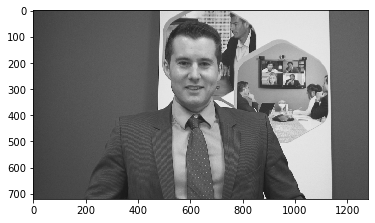

In [15]:
img = frame_processing(seq_name,0)
yuv_img = Image.fromarray(img.astype('uint8')).convert('YCbCr')

print("origin frame:")
plt.imshow(yuv_img)

In [16]:
def frame_padding(frame,CTU_size = 128):
    width , height = frame.shape[1],frame.shape[0]
    #print(width,height)
    width_CTU_nums = math.ceil(width/128)
    height_CTU_nums = math.ceil(height/128)
    pad_frame = np.zeros((height_CTU_nums*128,width_CTU_nums*128))
    for x in range(height):
        for y in range(width):
            pad_frame[x][y] = frame[x][y]
    return pad_frame

padding frame:


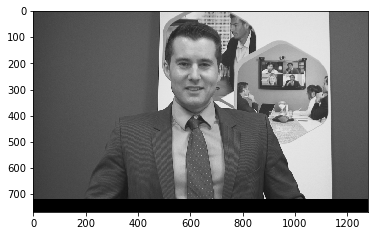

In [17]:
yuv_img_padding = frame_padding(img)
print("padding frame:")
yuv_img_padding = Image.fromarray(yuv_img_padding.astype('uint8')).convert('YCbCr')
plt.imshow(yuv_img_padding)

# BackBone

In [16]:
seq_list = ["RaceHorses",
            "BQSquare","BlowingBubbles","BasketballPass",
            ]
QPList = ["QP22","QP27","QP32","QP37"]

def gen_range(yuv_img,yuv_img_padding,currframe = 0,index = 0,rd_mataining={}):
    org_width,org_height = yuv_img.size
    width , height = yuv_img_padding.size
    
    InFirstCTU = 0
    with open(prediction_path+'frame'+str(currframe)+'.txt', 'w') as f:
        for blocky in range(0, height, 128):
            for blockx in range(0, width, 128):
                for beginy in range(blocky, blocky+128, 32):
                    for beginx in range(blockx, blockx+128, 32):
                        if beginx > org_width or beginx + 32 > org_width or beginy > org_height or beginy + 32 > org_height:
                            continue
                        val = ""
                        val += str(beginx)+" "+str(beginy)+" "+str(beginx+32)+" "+str(beginy+32)+" "
                        item = pred_all[index]
                        #print(item)
                        #InFirstCTU+=1
                        
                        for ele in rd_mataining[item]:
                            val += str(ele)+" "
                            

                        f.write("%s\n" % (val))
                        index+=1
                        InFirstCTU+=1
    return index

In [ ]:
for QP in QPList:
    for seq_name in seq_list:
        pred_all = []
        checkpoint_path = "./checkpoint/ckpt_"+QP+"_mobile/best_weight_branch1.h5"
        model.load_weights(checkpoint_path,by_name=True)       
        test_path = "/"+QP+"_block"
        idx = 0

        for i in range(13):

            predict_label = []
            test_dir = "D:/frame/"+seq_name+test_path+"/test"+str(i)
            print(test_dir)
            test_image_generator = ImageDataGenerator(rescale = 1./255)
            test_data_gen = test_image_generator.flow_from_directory(batch_size=1,
                                                                          directory=test_dir,
                                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                          shuffle=False,
                                                                          class_mode=None)

            prediction=model.predict_generator(test_data_gen,verbose=1)



            predict_label=np.argmax(prediction,axis=1)
            for label in predict_label:
                pred_all.append(label)

                
        rd_mataining = {0:[2,2,3,0],1:[2,4,4,0],2:[3,4,4,2]} #(5-6,7-8,9-10)
        #prediction_path = "D:/frame/"+seq_name+"/Prediction/"+QP+"/"
        prediction_path = "D:/frame/"+seq_name+"/re_pred/"+QP+"/"
        index = 0
        for i in range(13):
            img = frame_processing(seq_name,i)
            yuv_img = Image.fromarray(img.astype('uint8')).convert('YCbCr')
            yuv_img_padding = frame_padding(img)
            yuv_img_padding = Image.fromarray(yuv_img_padding.astype('uint8')).convert('YCbCr')
            index = gen_range(yuv_img,yuv_img_padding,i,index,rd_mataining)

# BackBone & Three Branch

In [ ]:
seq_list = ["Tango2","FoodMarket4","Campfire","CatRobot1","DaylightRoad2","ParkRunning3","MarketPlace","RitualDance",
            "Cactus","BasketballDrive","BQTerrace","RaceHorsesC","BQMall","PartyScene","BasketballDrill","RaceHorses",
            "BQSquare","BlowingBubbles","BasketballPass","FourPeople","Johnny","KristenAndSara"
            ]
#seq_list = ["Tango2"]
# seq_list = ["Cactus"]
QPList = ["QP37"]
#QPList = ["QP22","QP27","QP32","QP37"]

def gen_range(yuv_img,yuv_img_padding,currframe = 0,index = 0,rd_mataining={}):
    org_width,org_height = yuv_img.size
    width , height = yuv_img_padding.size
    
    InFirstCTU = 0
    with open(prediction_path+'frame'+str(currframe)+'.txt', 'w') as f:
        for blocky in range(0, height, 128):
            for blockx in range(0, width, 128):
                for beginy in range(blocky, blocky+128, 32):
                    for beginx in range(blockx, blockx+128, 32):
                        if beginx > org_width or beginx + 32 > org_width or beginy > org_height or beginy + 32 > org_height:
                            continue
                        val = ""
                        val += str(beginx)+" "+str(beginy)+" "+str(beginx+32)+" "+str(beginy+32)+" "
                        item = pred_all[index]
                        #print(item)
                        #InFirstCTU+=1
                        if index in candidate_idx:

                            #print(candidate_idx)
                            qtitem = pred_conf_label[index]

                            if qtitem == 0:
                                pred_all[index] = 3
                                #print('in')
                                for ele in rd_mataining[3]:
                                    val += str(ele)+" "

                            else:
                                pred_all[index] = 4
                                for ele in rd_mataining[4]:
                                    val += str(ele)+" "
                        elif index in candidate_idx_mid:

                            qtitem = pred_conf_label_mid[index]

                            if qtitem == 0:
                                pred_all[index] = 5
                                #print('in')
                                for ele in rd_mataining[5]:
                                    val += str(ele)+" "
                                

                            else:
                                pred_all[index] = 6
                                #print('in')
                                for ele in rd_mataining[6]:
                                    val += str(ele)+" "
                                    
                        elif index in candidate_idx_QT12:

                            qtitem = pred_conf_label_QT12[index]

                            if qtitem == 0:
                                pred_all[index] = 7
                                #print('in')
                                for ele in rd_mataining[7]:
                                    val += str(ele)+" "
                                

                            else:
                                pred_all[index] = 8
                                #print('in')
                                for ele in rd_mataining[8]:
                                    val += str(ele)+" "
                        else:
                            for ele in rd_mataining[item]:
                                val += str(ele)+" "
                        #print(pred_all_tt)
                        if pred_all_tt[index] == 0:
                            val += "1"
                        else :
                            val += "0"
                        f.write("%s\n" % (val))
                        index+=1
                        InFirstCTU+=1
    return index

In [ ]:
for QP in QPList:
    for seq_name in seq_list:
        pred_all = []
        pred_all_tt = []
        checkpoint_path = "./checkpoint/ckpt_"+QP+"_mobile/best_weight_branch1.h5"
        model.load_weights(checkpoint_path,by_name=True) 
        checkpoint_path = "./checkpoint/ckpt_"+QP+"_mobile_b2/best_weight_branch2.h5"
        model.load_weights(checkpoint_path,by_name=True) 
        checkpoint_path = "./checkpoint/ckpt_"+QP+"_mobile_b3/best_weight_branch3.h5"
        model.load_weights(checkpoint_path,by_name=True) 
        checkpoint_path = "./checkpoint/ckpt_"+QP+"_mobile_b4/best_weight_branch4.h5"
        model.load_weights(checkpoint_path,by_name=True) 
        checkpoint_path = "./checkpoint/ckpt_"+QP+"_mobile_tt/best_weight_branch_tt.h5"
        model.load_weights(checkpoint_path,by_name=True) 

        candidate_idx = []
        pred_conf_label = []
        candidate_idx_mid = []
        pred_conf_label_mid = []
        candidate_idx_QT12 = []
        pred_conf_label_QT12 = []
        Threshold = 0.6
        Threshold_QT12 = 0.5
        Threshold_QT78 = 0.5
        
        test_path = "/"+QP+"_block"
        idx = 0
        idx_mid = 0
        idx_QT12 = 0
        for i in range(13):

            predict_label = []
            test_dir = "D:/frame/"+seq_name+test_path+"/test"+str(i)
            print(test_dir)
            test_image_generator = ImageDataGenerator(rescale = 1./255)
            test_data_gen = test_image_generator.flow_from_directory(batch_size=1,
                                                                          directory=test_dir,
                                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                          shuffle=False,
                                                                          class_mode=None)

            prediction,pred_QT,pred_QT_mid,pred_QT12,pred_tt=model.predict_generator(test_data_gen,verbose=1)



            predict_label=np.argmax(prediction,axis=1)
            ###
            predict_label_tt=np.argmax(pred_tt,axis=1)
            for label in predict_label_tt:
                pred_all_tt.append(label)
            #print(pred_all_tt)
            ###
            for label in predict_label:
                pred_all.append(label)

            pred_QT_label = np.argmax(pred_QT, axis=1)
            pred_QT_mid_label = np.argmax(pred_QT_mid, axis=1)#
            pred_QT12_label = np.argmax(pred_QT12, axis=1)#
            #print(pred_QT12_label)
            ################  Depth910 QT 23 branch  ###############
            for label in pred_QT_label:
                pred_conf_label.append(label)
            for pred in pred_QT[:]:
                if(np.amax(pred, axis=0) >= Threshold and pred_all[idx] == 2):
                    candidate_idx.append(idx)
                idx+=1
            ################  Depth78 QT 23 branch  ###############
            for label in pred_QT_mid_label:
                pred_conf_label_mid.append(label)
            for pred in pred_QT_mid[:]:
                if(np.amax(pred, axis=0) >= Threshold_QT78 and pred_all[idx_mid] == 1):
                    candidate_idx_mid.append(idx_mid)
                idx_mid+=1
             ################   QT 12 branch  ###############
            for label in pred_QT12_label:  
                pred_conf_label_QT12.append(label)
            for pred in pred_QT12[:]:
                if(np.amax(pred, axis=0) >= Threshold_QT12 and pred_all[idx_QT12] == 0):
                    candidate_idx_QT12.append(idx_QT12)
                idx_QT12+=1
                
        rd_mataining = {0:[2,2,3,0],1:[2,4,4,0],2:[3,4,4,2],3:[2,5,2,5],4:[3,4,3,4],5:[2,4,2,4],6:[3,2,3,2],7:[2,0,2,0],8:[2,2,3,0]} #(5-6,7-8,9-10)
        #prediction_path = "D:/frame/"+seq_name+"/Prediction/"+QP+"/"
        prediction_path = "D:/frame/"+seq_name+"/Prediction/"+QP+"/"
        index = 0
        for i in range(13):
            img = frame_processing(seq_name,i)
            yuv_img = Image.fromarray(img.astype('uint8')).convert('YCbCr')
            yuv_img_padding = frame_padding(img)
            yuv_img_padding = Image.fromarray(yuv_img_padding.astype('uint8')).convert('YCbCr')
            index = gen_range(yuv_img,yuv_img_padding,i,index,rd_mataining)